In [7]:
#data cleanup
import pandas as pd
df_raw = pd.read_csv("Data.csv")

#get basic info. tells us there are no null values
df_raw.info()

#take a sample so that we can see what columns are categories
df_raw.sample(n=5)

#change dtype from object to category
digital_habits = pd.read_csv("Data.csv", dtype = {'gender':'category', 'region':'category', 'income_level':'category', 'daily_role':'category'})

#double check that there truly are no missing values
print(digital_habits.isna().sum())
#yep, no missing values. moving to a new cell.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3500 entries, 0 to 3499
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        3500 non-null   int64  
 1   age                       3500 non-null   int64  
 2   gender                    3500 non-null   object 
 3   region                    3500 non-null   object 
 4   income_level              3500 non-null   object 
 5   education_level           3500 non-null   object 
 6   daily_role                3500 non-null   object 
 7   device_hours_per_day      3500 non-null   float64
 8   phone_unlocks             3500 non-null   int64  
 9   notifications_per_day     3500 non-null   int64  
 10  social_media_mins         3500 non-null   int64  
 11  study_mins                3500 non-null   int64  
 12  physical_activity_days    3500 non-null   float64
 13  sleep_hours               3500 non-null   float64
 14  sleep_qu

In [63]:
# Looking for outliers in data and removing them
#import needed libraries & read the file
import pandas as pd
import numpy as np
df = pd.read_csv('Data.csv')

# find numeric columns, non numeric values cannot have outliers
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print("\nNumeric columns found:", numeric_cols)

# create function to find and remove outliers
def remove_outliers_iqr(dataframe, columns, threshold=1.5):
    df_clean = dataframe.copy()
    for col in columns: #first find interquartile range for each column
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        
        # create upper and lower limits
        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR
        
        # git rid of outliers
        df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]
    
    return df_clean

# remove outliers from data
numeric_cols.remove('high_risk_flag')
df_cleaned = remove_outliers_iqr(df, numeric_cols, threshold=1.5)

print(f"Rows removed: {len(df) - len(df_cleaned)}")
print(f"Original shape: {df.shape}")
print(f"Cleaned shape: {df_cleaned.shape}")

# save data cleanup changes
df_cleaned.to_csv('cleaned_data.csv', index=False)
print("\nCleaned data saved to 'cleaned_data.csv'")


Numeric columns found: ['id', 'age', 'device_hours_per_day', 'phone_unlocks', 'notifications_per_day', 'social_media_mins', 'study_mins', 'physical_activity_days', 'sleep_hours', 'sleep_quality', 'anxiety_score', 'depression_score', 'stress_level', 'happiness_score', 'focus_score', 'high_risk_flag', 'productivity_score', 'digital_dependence_score']
Rows removed: 773
Original shape: (3500, 24)
Cleaned shape: (2727, 24)

Cleaned data saved to 'cleaned_data.csv'


In [60]:
# find min and max for each numeric column with the cleaned data 
print("Minimum & maximum values for each column:")
print("="*50)

for col in df_cleaned.columns:
    if col in numeric_cols:
        min_val = df_cleaned[col].min()
        max_val = df_cleaned[col].max()
        print(f"\n{col}:")
        print(f"  Minimum: {min_val}")
        print(f"  Maximum: {max_val}")

Minimum & maximum values for each column:

id:
  Minimum: 1
  Maximum: 3500

age:
  Minimum: 13
  Maximum: 50

device_hours_per_day:
  Minimum: 0.28
  Maximum: 15.3

phone_unlocks:
  Minimum: 9
  Maximum: 317

notifications_per_day:
  Minimum: 22
  Maximum: 831

social_media_mins:
  Minimum: 0
  Maximum: 408

study_mins:
  Minimum: 0
  Maximum: 343

physical_activity_days:
  Minimum: 0.0
  Maximum: 7.0

sleep_hours:
  Minimum: 3.875985951216357
  Maximum: 10.733192741807692

sleep_quality:
  Minimum: 1.0
  Maximum: 5.0

anxiety_score:
  Minimum: 0.0
  Maximum: 15.558146836389197

depression_score:
  Minimum: 0.0
  Maximum: 21.0

stress_level:
  Minimum: 1.0
  Maximum: 10.0

happiness_score:
  Minimum: 0.0
  Maximum: 10.0

focus_score:
  Minimum: 0.0
  Maximum: 100.0

productivity_score:
  Minimum: 41.0
  Maximum: 89.0

digital_dependence_score:
  Minimum: 5.6
  Maximum: 62.2


<function matplotlib.pyplot.show(close=None, block=None)>

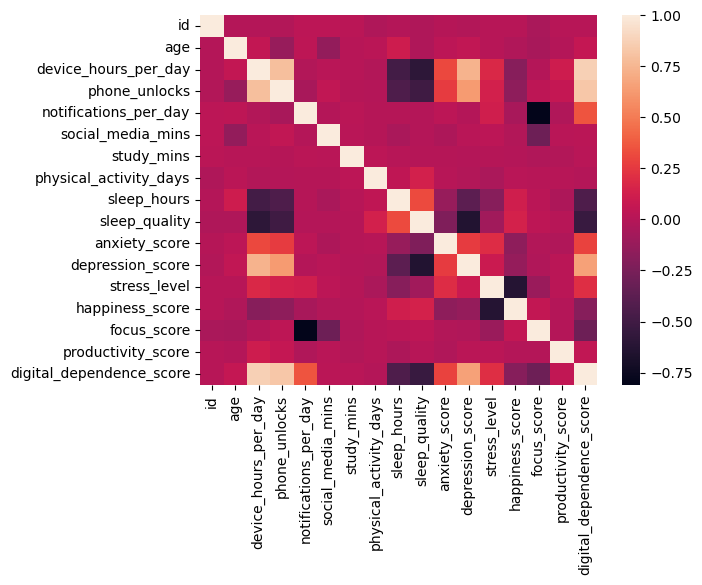

In [65]:
#let's look at overall correlation real quick
corr = df_cleaned[numeric_cols].corr()

import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(corr)
plt.show

In [11]:
#wow, this actually shows a lot about our data. as phoone unlocks and device hours per day increases, sleep quality and sleep hours both decrease. 
#as notifications per day increases, focus score decreases. but also, as sleep quality and hours decrease, depression increases. 
#the same negative correlation is found between stress and happiness, which makes sense. let's dive into some other details

#initialize screen time bins for ranges for data analysis
df_cleaned['screentime_bucket'] = pd.cut(df_cleaned['device_hours_per_day'], bins=[0, 3, 6, 9, float("inf")], labels = ["0-3", "3-6", "6-9", "9+"], right = False) 


#given men and women of the same screentime range, is either gender more prone to mental illness?
men_vs_women = df_cleaned.groupby(['gender', 'screentime_bucket'], observed=False).agg({'anxiety_score':'mean', 'depression_score':'mean', 'stress_level':'mean'})
print(men_vs_women)

#this shows us that there is no obvious corelation between gender and depression or stress, but there is a potential correlation between gender and anxiety. let's graph this.


                          anxiety_score  depression_score  stress_level
gender screentime_bucket                                               
Female 0-3                     8.313556          2.030303      5.181821
       3-6                     6.408875          4.794918      4.040618
       6-9                     6.622829          8.809524      4.690724
       9+                      9.768869         13.438735      5.947942
Male   0-3                     5.289157          2.349398      3.985343
       3-6                     3.924406          4.650108      4.289107
       6-9                     3.727969          8.722222      4.320419
       9+                      7.592593         13.497942      5.816105


<function matplotlib.pyplot.show(close=None, block=None)>

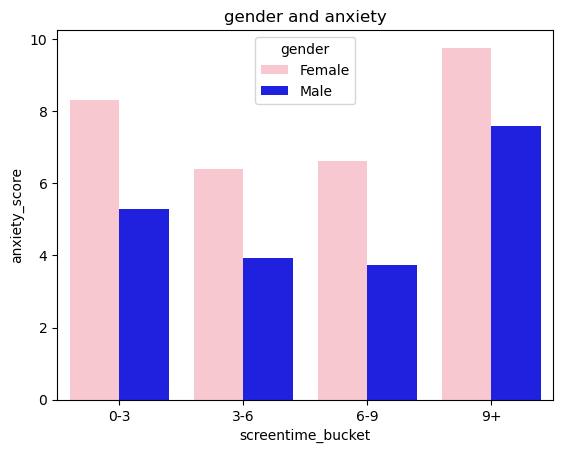

In [12]:
#gender and anxiety
sns.barplot(men_vs_women, x = 'screentime_bucket', y = 'anxiety_score', orient = 'v', hue = 'gender', palette = ['pink', 'blue'])
plt.title('gender and anxiety')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

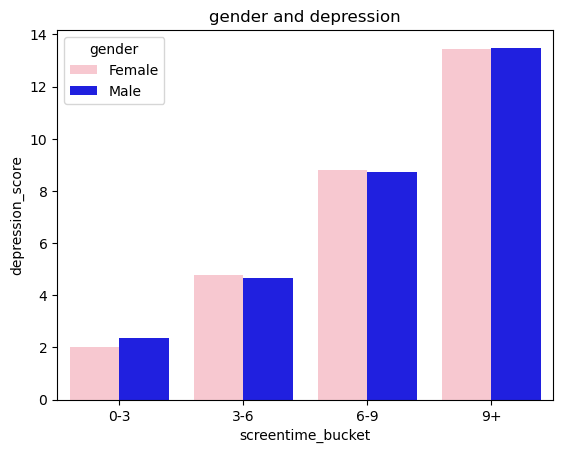

In [13]:
#gender and depression
sns.barplot(men_vs_women, x = 'screentime_bucket', y = 'depression_score', orient = 'v', hue = 'gender', palette = ['pink', 'blue'])
plt.title('gender and depression')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

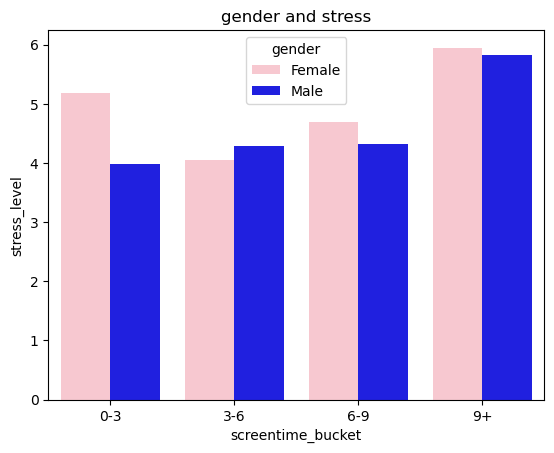

In [14]:
#gender and stress
sns.barplot(men_vs_women, x = 'screentime_bucket', y = 'stress_level', orient = 'v', hue = 'gender', palette = ['pink', 'blue'])
plt.title('gender and stress')
plt.show

In [15]:
#let's do this same thing with education level

#given men and women of the same screentime range, is either gender more prone to mental illness?
education_level = df_cleaned.groupby(['education_level', 'screentime_bucket'], observed=False).agg({'anxiety_score':'mean', 'depression_score':'mean', 'stress_level':'mean'})
print(education_level)

                                   anxiety_score  depression_score  \
education_level screentime_bucket                                    
Bachelor        0-3                     6.365060          2.169231   
                3-6                     5.217528          4.596603   
                6-9                     5.275296          8.923711   
                9+                      8.579235         13.159420   
High School     0-3                     6.858910          2.294118   
                3-6                     5.355847          4.921136   
                6-9                     5.160899          8.736842   
                9+                      9.054619         13.409938   
Master          0-3                     6.613983          2.066667   
                3-6                     5.376505          4.680851   
                6-9                     5.171323          8.610000   
                9+                      8.566053         13.956522   
PhD             0-3 

<function matplotlib.pyplot.show(close=None, block=None)>

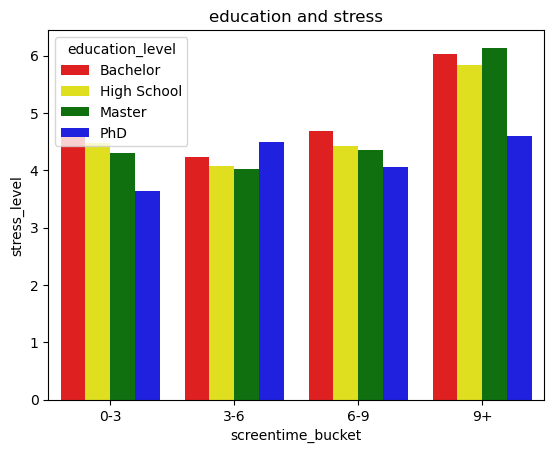

In [16]:
#this is pretty hard to read... let's graph it

sns.barplot(education_level, x = 'screentime_bucket', y = 'stress_level', orient = 'v', hue = 'education_level', palette = ['red', 'yellow', 'green', 'blue'])
plt.title('education and stress')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

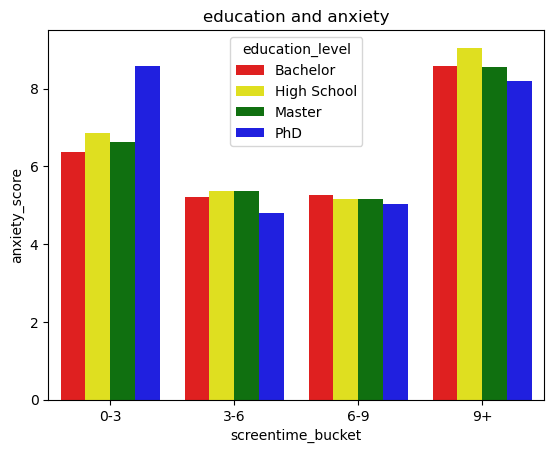

In [17]:
#anxiety?

sns.barplot(education_level, x = 'screentime_bucket', y = 'anxiety_score', orient = 'v', hue = 'education_level', palette = ['red', 'yellow', 'green', 'blue'])
plt.title('education and anxiety')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

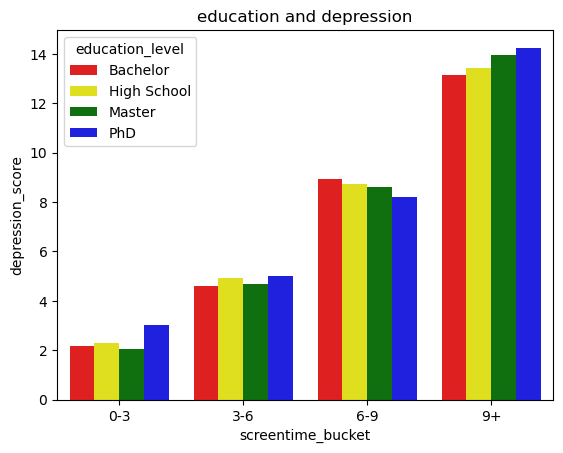

In [18]:
#depression?

sns.barplot(education_level, x = 'screentime_bucket', y = 'depression_score', orient = 'v', hue = 'education_level', palette = ['red', 'yellow', 'green', 'blue'])
plt.title('education and depression')
plt.show

In [19]:
#let's look at age now
df_cleaned['age_bucket'] = pd.cut(df_cleaned['age'], bins=[13, 18, 25, 30, 40, 50, float("inf")], labels = ["teenager", "college-aged", "25-30", "30-40", "40-50", "50+"], right = False)

age_and_screentime = df_cleaned.groupby(['age_bucket', 'screentime_bucket'], observed=False).agg({'anxiety_score':'mean', 'depression_score':'mean', 'stress_level':'mean'})
print(age_and_screentime)

                                anxiety_score  depression_score  stress_level
age_bucket   screentime_bucket                                               
teenager     0-3                     6.625094          2.117647      4.674792
             3-6                     5.254623          4.818841      4.477277
             6-9                     5.075915          9.070312      4.608102
             9+                      8.567656         12.750000      5.318717
college-aged 0-3                     6.498742          2.340000      4.295200
             3-6                     5.328739          4.622581      4.073183
             6-9                     5.045032          8.768977      4.659255
             9+                      8.528752         13.310606      6.251395
25-30        0-3                     7.071181          2.333333      4.749300
             3-6                     5.420135          4.791444      3.957387
             6-9                     5.321004          8.670213 

<function matplotlib.pyplot.show(close=None, block=None)>

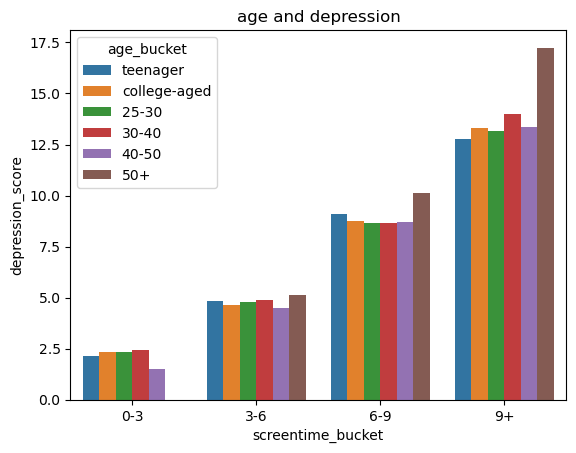

In [20]:
#age and depression
sns.barplot(age_and_screentime, x = 'screentime_bucket', y = 'depression_score', orient = 'v', hue = 'age_bucket')
plt.title('age and depression')
plt.show

#interesting. the 50+ population reports higher depression scores regardless of screentime bucket

<function matplotlib.pyplot.show(close=None, block=None)>

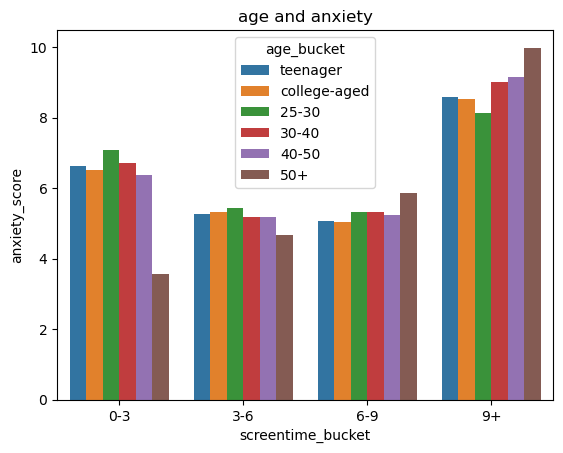

In [21]:
#age and anxiety
sns.barplot(age_and_screentime, x = 'screentime_bucket', y = 'anxiety_score', orient = 'v', hue = 'age_bucket')
plt.title('age and anxiety')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

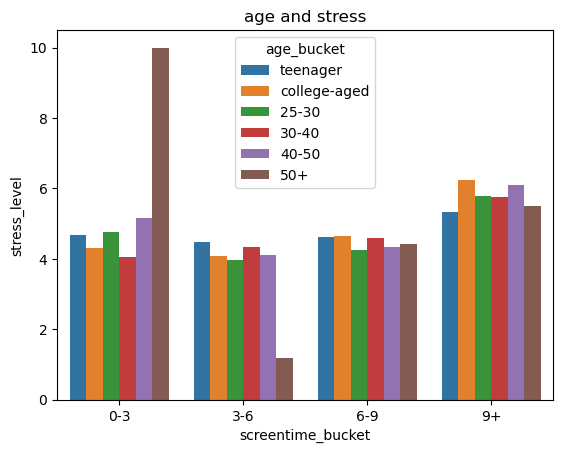

In [22]:
#age and stress
sns.barplot(age_and_screentime, x = 'screentime_bucket', y = 'stress_level', orient = 'v', hue = 'age_bucket')
plt.title('age and stress')
plt.show

In [23]:
#we want to look at the affect of studying on anxiety and depression

#we'll use qcut for binning for this to even out the spread with standard 4 quantiles
df_cleaned['study_bucket'] = pd.qcut(df_cleaned['study_mins'], 4)

digital_study_effects = df_cleaned.groupby(['study_bucket'], observed=False).agg({'anxiety_score':'mean', 'depression_score':'mean', 'stress_level':'mean'})
print(digital_study_effects)

                anxiety_score  depression_score  stress_level
study_bucket                                                 
(-0.001, 42.0]       5.953044          7.771470      4.598824
(42.0, 102.0]        5.997181          7.819858      4.695553
(102.0, 162.0]       5.870091          7.827011      4.606966
(162.0, 343.0]       5.959214          7.628698      4.606229


In [24]:
#this seems like there is little to no variation across the study buckets, 
#which is very interesting to me, because that was the opposite of my hypothesis. let's move on

In [25]:
#no need for bins on this one. let's look at stress level as related to income level
stress_and_income = df_cleaned.groupby(['income_level'], observed=False).agg({'stress_level':'mean'})
print(stress_and_income)

              stress_level
income_level              
High              4.878519
Low               4.604100
Lower-Mid         4.510541
Upper-Mid         4.661229


In [26]:
#litte to no variation. nothing to explore here.

In [27]:
#now, we want to see if happiness is lower the larger social media mins are

df_cleaned['social_bucket'] = pd.qcut(df_cleaned['social_media_mins'], 4)

social_media_and_happiness = df_cleaned.groupby(['social_bucket'], observed=False).agg({'happiness_score':'mean', 'depression_score':'mean'})
print(social_media_and_happiness)

                happiness_score  depression_score
social_bucket                                    
(-0.001, 65.0]         6.790571          7.729927
(65.0, 111.0]          6.826264          7.862518
(111.0, 178.0]         6.967479          7.624441
(178.0, 408.0]         6.752571          7.827941


In [28]:
#no variation on happiness score or depression score. this is odd...

In [29]:
#is anxiety higher in people with lower happiness scores?
df_cleaned['happiness_bucket'] = pd.qcut(df_cleaned['happiness_score'], 4)

anxiety_and_happiness = df_cleaned.groupby(['happiness_bucket'], observed=False).agg({'anxiety_score':'mean'}).reset_index()
print(anxiety_and_happiness)

  happiness_bucket  anxiety_score
0    (-0.001, 5.1]       6.576493
1       (5.1, 8.0]       6.559575
2       (8.0, 9.0]       5.578646
3      (9.0, 10.0]       5.057330


<function matplotlib.pyplot.show(close=None, block=None)>

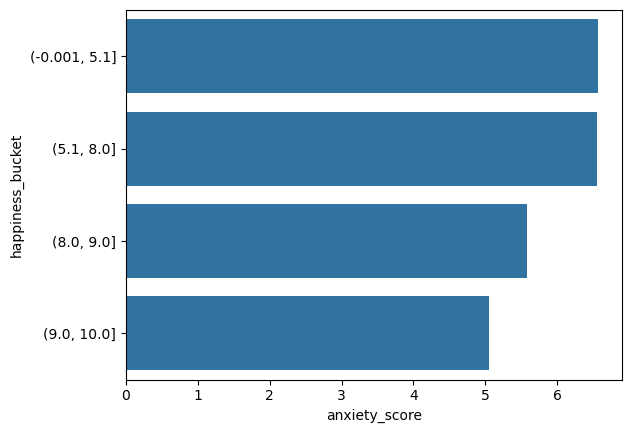

In [30]:
#there is a correlation in this one. let's graph it
sns.barplot(data = anxiety_and_happiness, y = 'happiness_bucket', x = 'anxiety_score')
plt.show

In [31]:
#do people who use screens less focus better?
screens_and_focus = df_cleaned.groupby('screentime_bucket', observed = False).agg({'focus_score':'mean'})
print(screens_and_focus)

                   focus_score
screentime_bucket             
0-3                  45.944938
3-6                  46.165264
6-9                  46.361760
9+                   45.561662


In [32]:
#this doesn't seem to suggest a correlation. what about social media?
focus_and_social = df_cleaned.groupby('social_bucket', observed = False).agg({'focus_score':'mean'})
print(focus_and_social)

                focus_score
social_bucket              
(-0.001, 65.0]    52.544793
(65.0, 111.0]     50.031808
(111.0, 178.0]    45.643175
(178.0, 408.0]    36.144977


<function matplotlib.pyplot.show(close=None, block=None)>

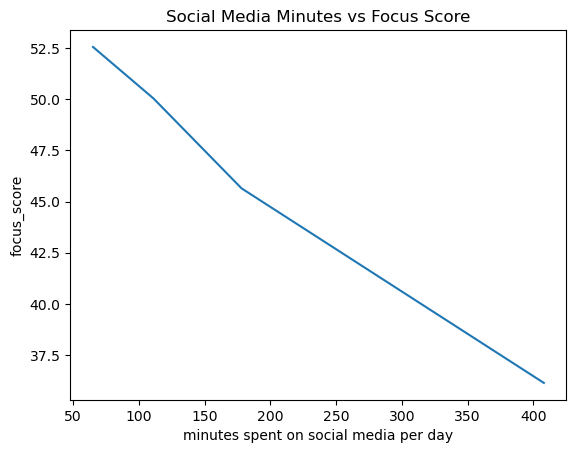

In [33]:
#okay so this does suggest a correlation. let's graph it.
upper_ends = [65, 111, 178, 408]

sns.lineplot(data = focus_and_social, x = upper_ends, y = 'focus_score')
plt.xlabel('minutes spent on social media per day')
plt.title('Social Media Minutes vs Focus Score')
plt.show

In [34]:
#we had wondered what the social media and screen time habits of those with the high risk flag were, 
#but no observations in this dataset had the high risk flag

In [35]:
#does focus level change according to device type?
device_and_focus = df_cleaned.groupby('device_type', observed = False).agg({'focus_score':'mean'})
print(device_and_focus)

             focus_score
device_type             
Android        47.241151
Laptop         46.311615
Tablet         45.743145
iPhone         45.073598


In [36]:
#these are too close to draw any kind of conclusion

In [37]:
#does stress level increase with number of notifications?
df_cleaned['notification_bucket'] = pd.qcut(df_cleaned['notifications_per_day'], 10)

stress_and_notifications = df_cleaned.groupby(['notification_bucket'], observed=False).agg({'stress_level':'mean'})
print(stress_and_notifications)

                     stress_level
notification_bucket              
(21.999, 106.6]          4.367710
(106.6, 146.0]           3.764193
(146.0, 184.0]           4.399423
(184.0, 218.0]           4.788448
(218.0, 259.0]           4.657276
(259.0, 294.0]           4.464664
(294.0, 354.2]           4.543297
(354.2, 436.0]           4.715355
(436.0, 539.0]           5.133692
(539.0, 831.0]           5.475367


<function matplotlib.pyplot.show(close=None, block=None)>

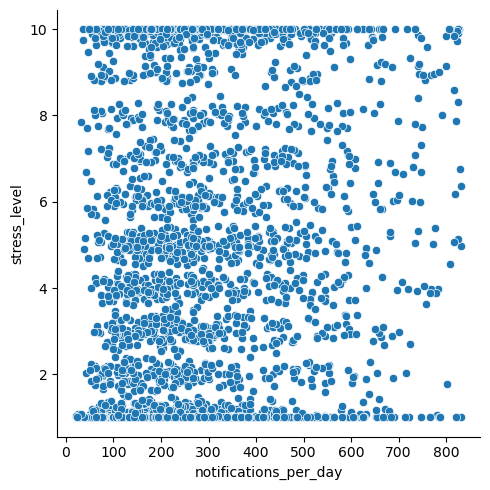

In [38]:
#i'm gonna try graphing this without a grouping...
sns.relplot(data = df_cleaned, x = 'notifications_per_day', y = 'stress_level')
plt.show

#lol this is hilarious you can't see anything

<function matplotlib.pyplot.show(close=None, block=None)>

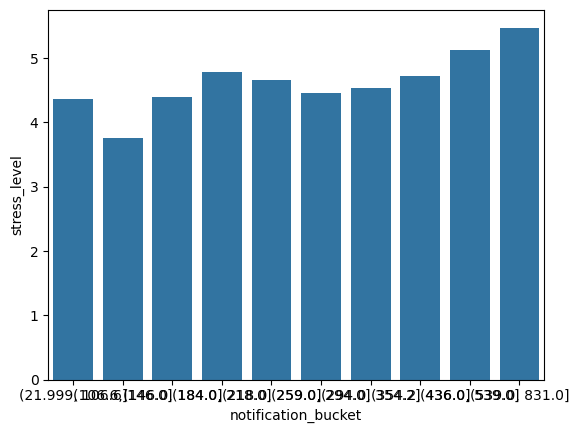

In [39]:
#graph it with grouping
sns.barplot(data = stress_and_notifications, y = 'stress_level', x = 'notification_bucket')
plt.show

In [ ]:
#high risk flag!


In [40]:
#this was the end of what we had planned. can look more explicitly at affects on sleep or overall affects on mental health

<function matplotlib.pyplot.show(close=None, block=None)>

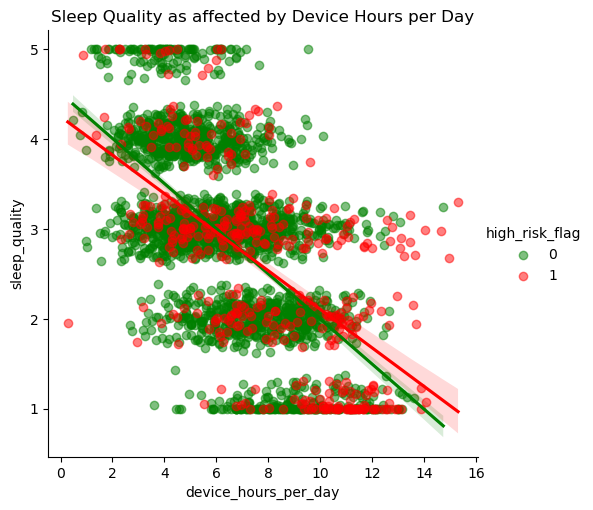

In [48]:
#let's look at device hours versus sleep quality
sns.lmplot(data = df_cleaned, x = 'device_hours_per_day', y = 'sleep_quality', scatter_kws={'alpha': 0.5}, hue = 'high_risk_flag', palette = ['green', 'red'])
plt.title('Sleep Quality as affected by Device Hours per Day')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

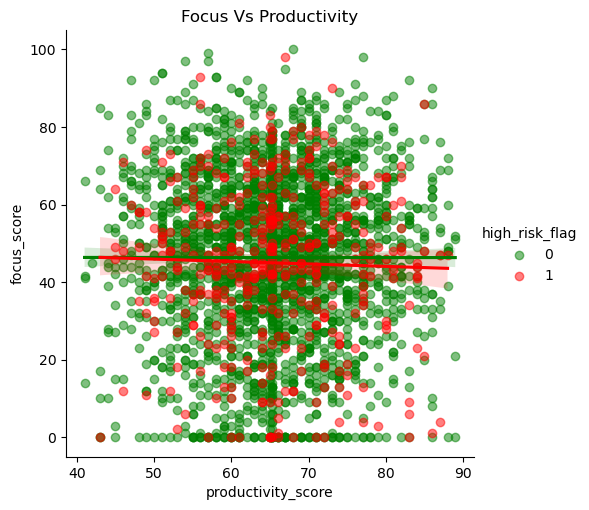

In [67]:
sns.lmplot(data = df_cleaned, x = 'productivity_score', y = 'focus_score', scatter_kws={'alpha': 0.5}, hue = 'high_risk_flag', palette = ['green', 'red'])
plt.title('Focus Vs Productivity')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

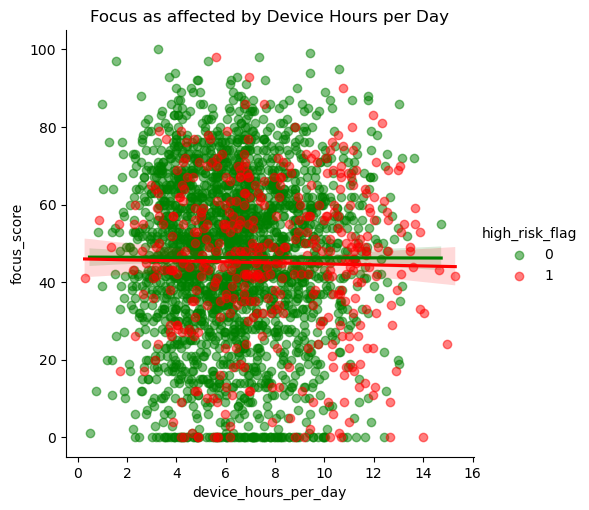

In [66]:
sns.lmplot(data = df_cleaned, x = 'device_hours_per_day', y = 'focus_score', scatter_kws={'alpha': 0.5}, hue = 'high_risk_flag', palette = ['green', 'red'])
plt.title('Focus as affected by Device Hours per Day')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

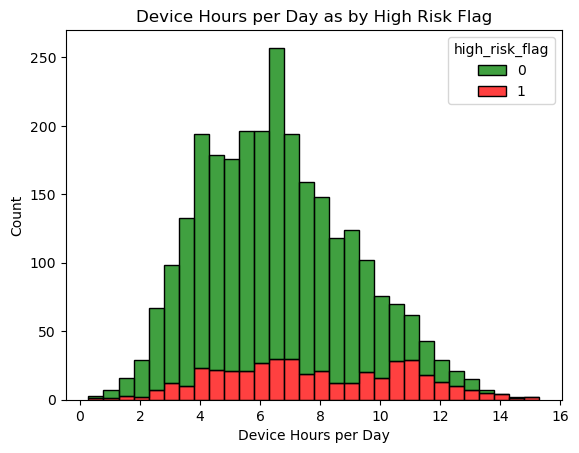

In [50]:
sns.histplot(data=df_cleaned, x="device_hours_per_day", hue="high_risk_flag", palette = ['green', 'red'], multiple="stack")
plt.xlabel('Device Hours per Day')
plt.title('Device Hours per Day as by High Risk Flag')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

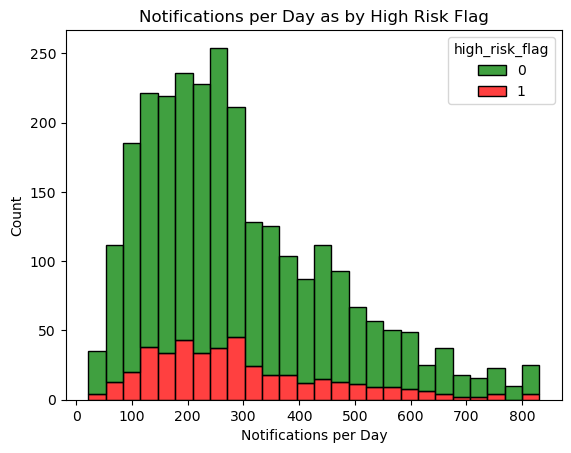

In [51]:
sns.histplot(data=df_cleaned, x="notifications_per_day", hue="high_risk_flag", palette = ['green', 'red'], multiple="stack")
plt.xlabel('Notifications per Day')
plt.title('Notifications per Day as by High Risk Flag')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

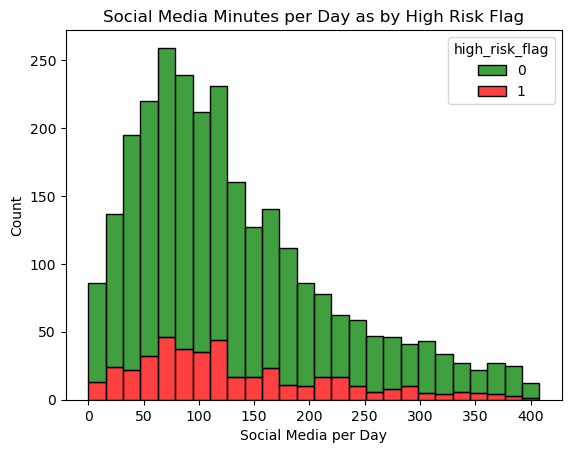

In [52]:
sns.histplot(data=df_cleaned, x="social_media_mins", hue="high_risk_flag", palette = ['green', 'red'], multiple="stack")
plt.xlabel('Social Media per Day')
plt.title('Social Media Minutes per Day as by High Risk Flag')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

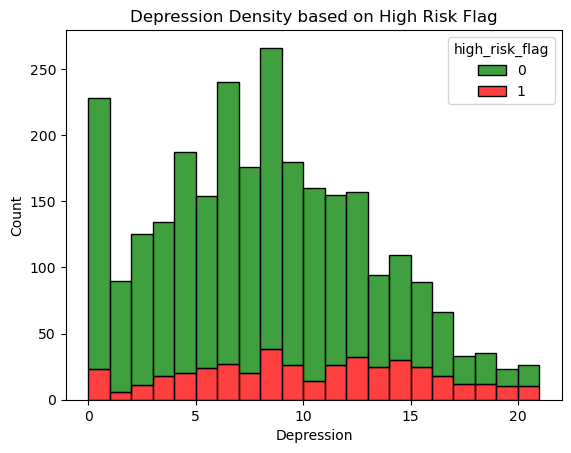

In [54]:
sns.histplot(data=df_cleaned, x="depression_score", hue="high_risk_flag", palette = ['green', 'red'], multiple="stack")
plt.xlabel('Depression')
plt.title('Depression Density based on High Risk Flag')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

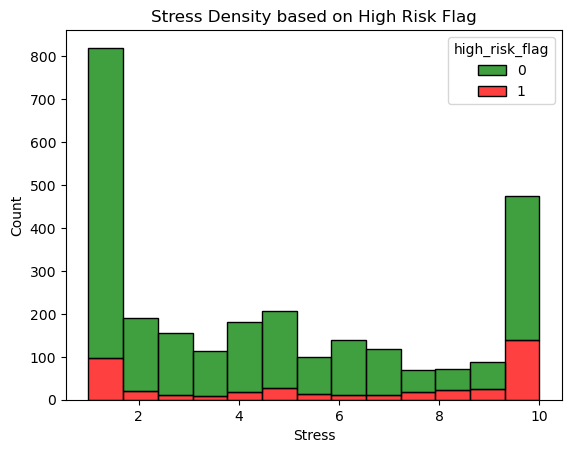

In [55]:
sns.histplot(data=df_cleaned, x="stress_level", hue="high_risk_flag", palette = ['green', 'red'], multiple="stack")
plt.xlabel('Stress')
plt.title('Stress Density based on High Risk Flag')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

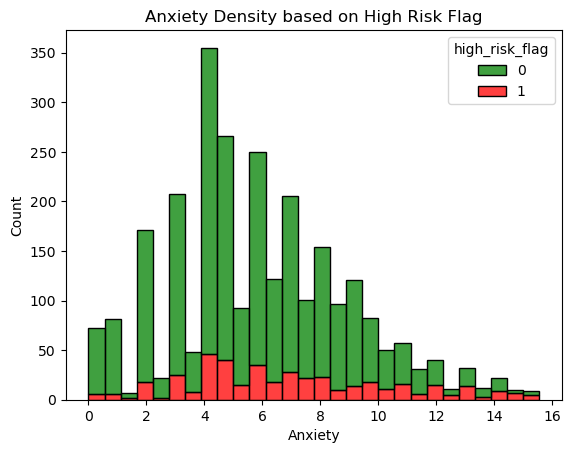

In [56]:
sns.histplot(data=df_cleaned, x="anxiety_score", hue="high_risk_flag", palette = ['green', 'red'], multiple="stack")
plt.xlabel('Anxiety')
plt.title('Anxiety Density based on High Risk Flag')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

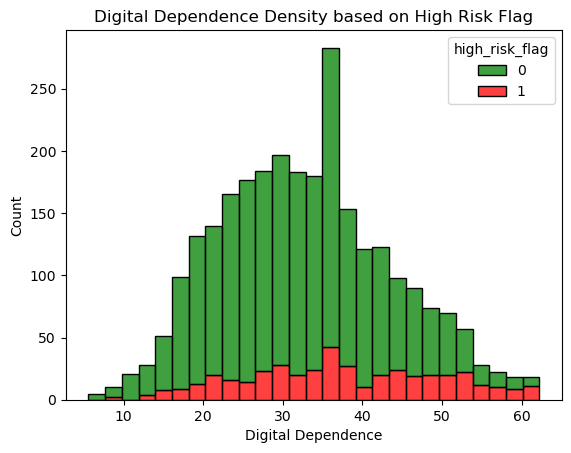

In [57]:
sns.histplot(data=df_cleaned, x="digital_dependence_score", hue="high_risk_flag", palette = ['green', 'red'], multiple="stack")
plt.xlabel('Digital Dependence')
plt.title('Digital Dependence Density based on High Risk Flag')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

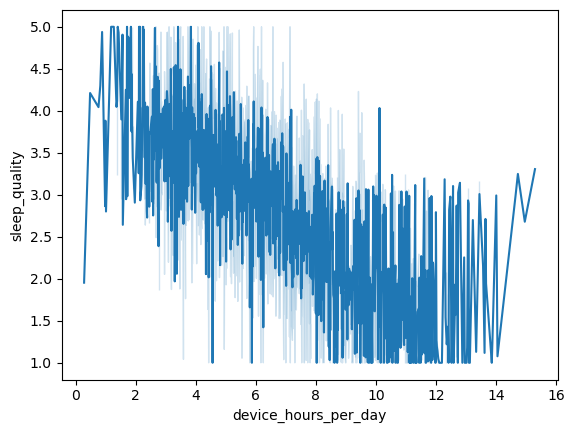

In [42]:
#same thing different graph
sns.lineplot(data = df_cleaned, x = 'device_hours_per_day', y = 'sleep_quality')
plt.show
#i like the other plot better

<function matplotlib.pyplot.show(close=None, block=None)>

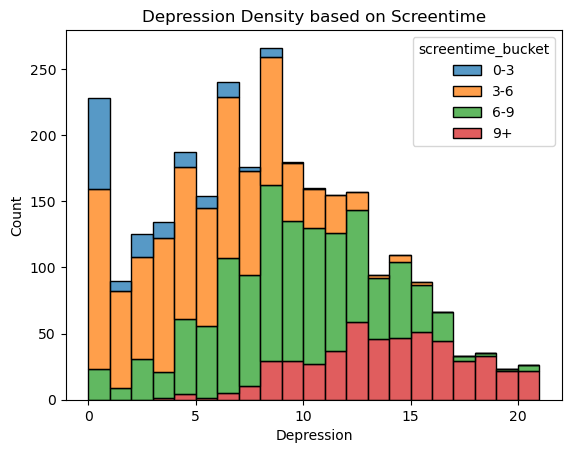

In [43]:
#depression histogram as it relates to screen time
sns.histplot(data=df_cleaned, x="depression_score", hue="screentime_bucket", multiple="stack")
plt.xlabel('Depression')
plt.title('Depression Density based on Screentime')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

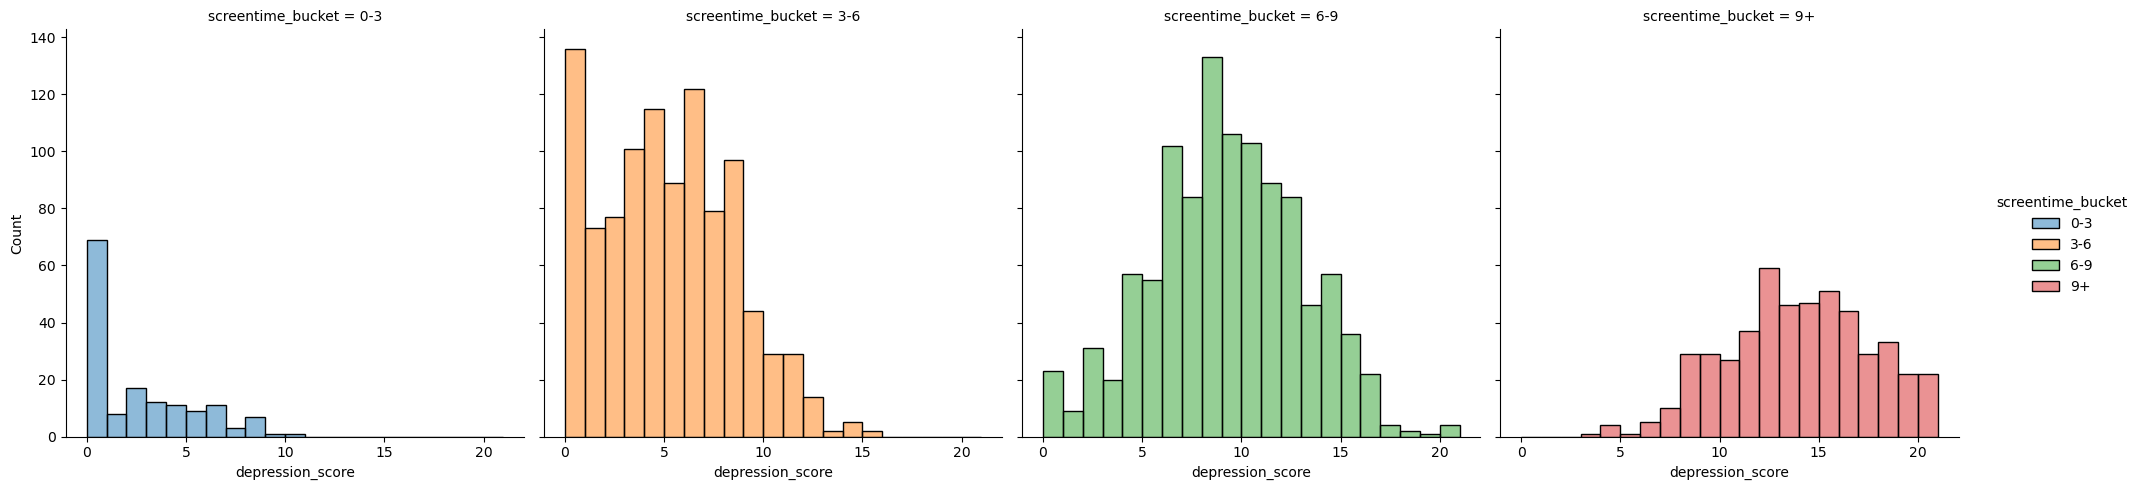

In [44]:
#depression histogram as it relates to screentime, split by screentime bucket
sns.displot(data=df_cleaned, x="depression_score", hue="screentime_bucket", col = "screentime_bucket")
plt.show

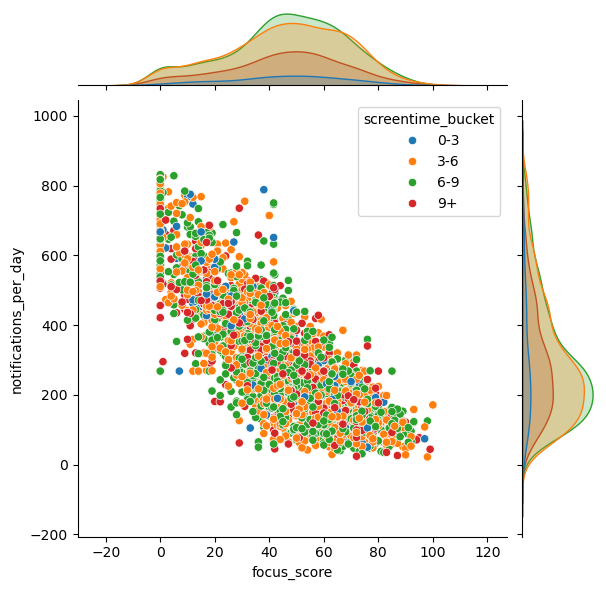

In [45]:
#focus score affected by notifications per day, sorted by screentime
sns.jointplot(data=df_cleaned, x = 'focus_score', y = 'notifications_per_day', hue = 'screentime_bucket')

In [46]:
df_cleaned.sample(n=10)

,id,age,gender,region,income_level,education_level,daily_role,device_hours_per_day,phone_unlocks,notifications_per_day,...,high_risk_flag,device_type,productivity_score,digital_dependence_score,screentime_bucket,age_bucket,study_bucket,social_bucket,happiness_bucket,notification_bucket
3098,3099,19,Female,Middle East,Low,Bachelor,Student,5.08,144,332,...,0,Tablet,64.0,36.684152,3-6,college-aged,"(42.0, 102.0]","(111.0, 178.0]","(5.1, 8.0]","(294.0, 354.2]"
2490,2491,20,Male,North America,Lower-Mid,Bachelor,Part-time/Shift,3.38,91,80,...,0,Laptop,65.0,15.300000,3-6,college-aged,"(102.0, 162.0]","(111.0, 178.0]","(8.0, 9.0]","(21.999, 106.6]"
2566,2567,25,Male,Europe,Lower-Mid,Bachelor,Full-time Employee,10.48,268,297,...,0,Tablet,55.0,53.400000,9+,25-30,"(102.0, 162.0]","(-0.001, 65.0]","(5.1, 8.0]","(294.0, 354.2]"
2701,2702,21,Female,Europe,Low,High School,Part-time/Shift,6.12,116,475,...,0,iPhone,76.0,33.800000,6-9,college-aged,"(-0.001, 42.0]","(111.0, 178.0]","(-0.001, 5.1]","(436.0, 539.0]"
3252,3253,28,Male,Africa,Low,Master,Full-time Employee,6.42,111,140,...,0,iPhone,71.0,26.300000,6-9,25-30,"(-0.001, 42.0]","(65.0, 111.0]","(-0.001, 5.1]","(106.6, 146.0]"
1928,1929,40,Male,South America,Lower-Mid,PhD,Full-time Employee,4.08,97,68,...,0,Laptop,76.0,18.700000,3-6,40-50,"(-0.001, 42.0]","(65.0, 111.0]","(9.0, 10.0]","(21.999, 106.6]"
52,53,21,Female,Europe,Low,Bachelor,Student,7.94,141,802,...,0,Android,58.0,49.100000,6-9,college-aged,"(102.0, 162.0]","(-0.001, 65.0]","(9.0, 10.0]","(539.0, 831.0]"
691,692,30,Female,Middle East,Upper-Mid,Bachelor,Full-time Employee,6.37,111,421,...,0,iPhone,77.0,33.300000,6-9,30-40,"(102.0, 162.0]","(-0.001, 65.0]","(-0.001, 5.1]","(354.2, 436.0]"
2536,2537,30,Male,Europe,Lower-Mid,Bachelor,Full-time Employee,5.85,127,404,...,0,iPhone,75.0,33.100000,3-6,30-40,"(162.0, 343.0]","(178.0, 408.0]","(5.1, 8.0]","(354.2, 436.0]"
2179,2180,39,Male,North America,Lower-Mid,Bachelor,Unemployed_Looking,4.41,101,731,...,0,Tablet,65.0,36.900000,3-6,30-40,"(42.0, 102.0]","(-0.001, 65.0]","(8.0, 9.0]","(539.0, 831.0]"
